## IMDB Movie Rating Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

In [1]:
import pandas as pd

# reading the training data
movie_train = pd.read_csv('movie_review_train.csv')
movie_test = pd.read_csv('movie_review_test.csv')
print(movie_train.head())
print("\n")
print(movie_test.head())

  class                                               text
0   Pos   a common complaint amongst film critics is   ...
1   Pos   whew   this film oozes energy   the kind of b...
2   Pos   steven spielberg s   amistad     which is bas...
3   Pos   he has spent his entire life in an awful litt...
4   Pos   being that it is a foreign language film with...


  class                                               text
0   Pos   films adapted from comic books have had plent...
1   Pos   every now and then a movie comes along from a...
2   Pos   you ve got mail works alot better than it des...
3   Pos      jaws   is a rare film that grabs your atte...
4   Pos   moviemaking is a lot like being the general m...


In [2]:
# number of ratings / documents
len(movie_train)

1600

In [3]:
# counting neg and pos instances in train dataset
movie_review_train = movie_train['class'].value_counts()
movie_review_train

Neg    800
Pos    800
Name: class, dtype: int64

In [4]:
# counting neg and pos instances in test dataset
movie_review_test = movie_test['class'].value_counts()
movie_review_test

Neg    200
Pos    200
Name: class, dtype: int64

In [5]:
# mapping labels to 0 and 1 for train and the test data set
movie_train['label'] = movie_train['class'].map({'Neg':0, 'Pos':1})
movie_test['label'] = movie_test['class'].map({'Neg':0, 'Pos':1})

In [6]:
print(movie_train.head())
print("\n")
print(movie_test.head())

  class                                               text  label
0   Pos   a common complaint amongst film critics is   ...      1
1   Pos   whew   this film oozes energy   the kind of b...      1
2   Pos   steven spielberg s   amistad     which is bas...      1
3   Pos   he has spent his entire life in an awful litt...      1
4   Pos   being that it is a foreign language film with...      1


  class                                               text  label
0   Pos   films adapted from comic books have had plent...      1
1   Pos   every now and then a movie comes along from a...      1
2   Pos   you ve got mail works alot better than it des...      1
3   Pos      jaws   is a rare film that grabs your atte...      1
4   Pos   moviemaking is a lot like being the general m...      1


In [7]:
# we can now drop the column 'class'
movie_train = movie_train.drop('class', axis=1)
movie_test = movie_test.drop('class', axis=1)

print(movie_train.head())
print("\n")
print(movie_test.head())

                                                text  label
0   a common complaint amongst film critics is   ...      1
1   whew   this film oozes energy   the kind of b...      1
2   steven spielberg s   amistad     which is bas...      1
3   he has spent his entire life in an awful litt...      1
4   being that it is a foreign language film with...      1


                                                text  label
0   films adapted from comic books have had plent...      1
1   every now and then a movie comes along from a...      1
2   you ve got mail works alot better than it des...      1
3      jaws   is a rare film that grabs your atte...      1
4   moviemaking is a lot like being the general m...      1


In [8]:
# convert to X and y (Train dataset)
X_train = movie_train.text
y_train = movie_train.label
print(X_train.shape)
print(y_train.shape)

(1600,)
(1600,)


In [9]:
# convert to X and y (Test dataset)
X_test = movie_test.text
y_test = movie_test.label
print(X_test.shape)
print(y_test.shape)

(400,)
(400,)


In [10]:
# splitting into test and train
#from sklearn.model_selection  import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#X_train.head()

In [12]:
#y_train.head()

In [13]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [14]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
# printing the vocabulary
vect.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [16]:
# vocab size
len(vect.vocabulary_.keys())


35858

#### Suppose we don't want to consider those (rare) words which have appeared only in 3% of the documents, or say those (extremely common ones) which have appeared in 80% of the documents.

- What is the size of the new vocabulary?

In [17]:
vect_min_max_df_train = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect_min_max_df_test = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [18]:
vect_min_max_df_train.fit(X_train)
#vect_min_max_df_test.fit(X_test)
#vect_min_max_df_train.fit(X_test)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
# printing the vocabulary
print(vect_min_max_df_train.vocabulary_)
print("\n")
#print(vect_min_max_df_test.vocabulary_)

{'common': 264, 'critics': 323, 'aren': 78, 'available': 101, 'gives': 618, 'hope': 693, 'art': 81, 'writing': 1632, 'isn': 753, 'dead': 342, 'hollywood': 690, 'need': 970, 'look': 853, 'films': 549, 'content': 287, 'paul': 1037, 'script': 1248, 'takes': 1429, 'thriller': 1471, 'late': 805, 'delivers': 357, 'telling': 1449, 'post': 1089, 'war': 1571, 'american': 59, 'dream': 413, 'tv': 1512, 'radio': 1145, 'heavy': 673, 'direction': 386, 'robert': 1205, 'performances': 1043, 'john': 766, 'rob': 1204, 'perfectly': 1041, 'usually': 1537, 'quality': 1136, 'sets': 1272, 'camera': 192, 'work': 1618, 'recent': 1165, 'century': 213, 'period': 1044, 'pieces': 1056, 'years': 1638, 'old': 1001, 'images': 716, 'true': 1502, 'era': 464, 'generation': 605, 'gone': 625, '15': 4, 'world': 1623, 'themes': 1461, 'good': 626, 'life': 831, 'family': 508, 'match': 894, 'father': 521, 'fame': 506, 'audience': 99, 'appear': 72, 'familiar': 507, 'current': 328, 'rise': 1201, 'fall': 503, 'like': 834, 'michae

In [20]:
# vocab size
print(len(vect_min_max_df_train.vocabulary_.keys()))

#print(len(vect_min_max_df_test.vocabulary_.keys()))

1643


In [21]:
# transforming the train and test datasets
X_train_transformed = vect_min_max_df_train.transform(X_train)
#X_test_transformed = vect_min_max_df_test.transform(X_test)
X_test_transformed = vect_min_max_df_train.transform(X_test)

In [22]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

print(type(X_test_transformed))
print(X_test_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 4)	1
  (0, 59)	2
  (0, 72)	1
  (0, 78)	1
  (0, 81)	1
  (0, 99)	3
  (0, 101)	1
  (0, 192)	1
  (0, 211)	1
  (0, 213)	1
  (0, 220)	1
  (0, 264)	2
  (0, 287)	1
  (0, 316)	1
  (0, 323)	1
  (0, 328)	1
  (0, 340)	1
  (0, 342)	1
  (0, 357)	1
  (0, 386)	1
  (0, 413)	2
  (0, 445)	2
  (0, 464)	1
  (0, 503)	1
  (0, 506)	1
  :	:
  (1599, 1247)	1
  (1599, 1258)	2
  (1599, 1267)	1
  (1599, 1271)	1
  (1599, 1331)	1
  (1599, 1335)	1
  (1599, 1339)	1
  (1599, 1366)	3
  (1599, 1371)	1
  (1599, 1375)	1
  (1599, 1379)	1
  (1599, 1413)	1
  (1599, 1421)	1
  (1599, 1429)	2
  (1599, 1447)	1
  (1599, 1501)	1
  (1599, 1533)	1
  (1599, 1550)	1
  (1599, 1555)	1
  (1599, 1556)	1
  (1599, 1570)	1
  (1599, 1579)	2
  (1599, 1589)	1
  (1599, 1609)	1
  (1599, 1616)	1
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 11)	1
  (0, 18)	2
  (0, 23)	1
  (0, 29)	1
  (0, 31)	1
  (0, 53)	1
  (0, 73)	1
  (0, 94)	1
  (0, 110)	1
  (0, 118)	1
  (0, 133)	1
  (0, 134)	1
  (0, 140)	1
  (0, 141)	1
 

In [23]:
# non zero entries test ds
X_test_transformed.count_nonzero()

51663

In [24]:
# non zero entries train ds
X_train_transformed.count_nonzero()

217396

### 2. Building the Model: Multinomial Naive Bayes

In [26]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [27]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 3. Building the Model: Bernoulli Naive Bayes

In [34]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X_train_transformed, y_train)

y_pred_class = bnb.predict(X_test_transformed)

# also works
# bnb.fit(X_transformed.toarray(), y_train)

# predicting probability of test data
bnb.predict_proba(X_test_transformed)
prob_bnb = bnb.predict_proba(X_test_transformed)
prob_bnb

array([[9.48171309e-03, 9.90518287e-01],
       [6.49769619e-03, 9.93502304e-01],
       [3.94902967e-01, 6.05097033e-01],
       [2.04992401e-12, 1.00000000e+00],
       [9.98827241e-01, 1.17275875e-03],
       [1.78941734e-12, 1.00000000e+00],
       [5.94773559e-07, 9.99999405e-01],
       [2.02838492e-03, 9.97971615e-01],
       [9.17950086e-01, 8.20499136e-02],
       [9.44944057e-02, 9.05505594e-01],
       [9.97389573e-04, 9.99002610e-01],
       [8.55906408e-04, 9.99144094e-01],
       [3.30288186e-03, 9.96697118e-01],
       [2.50950625e-02, 9.74904938e-01],
       [7.32820406e-05, 9.99926718e-01],
       [5.14487298e-01, 4.85512702e-01],
       [9.77854644e-01, 2.21453565e-02],
       [2.42691437e-09, 9.99999998e-01],
       [9.44024181e-03, 9.90559758e-01],
       [9.91992498e-01, 8.00750156e-03],
       [9.66449102e-01, 3.35508975e-02],
       [4.86743623e-03, 9.95132564e-01],
       [9.99484407e-01, 5.15592846e-04],
       [2.34114640e-08, 9.99999977e-01],
       [1.307296

### Model Evaluation

In [35]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.79

In [36]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[177,  23],
       [ 61, 139]])

In [37]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[177  23]
 [ 61 139]]


In [38]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.695


In [39]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.885


In [40]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8580246913580247
0.8580246913580247


In [41]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8580246913580247
PRECISION SCORE : 0.8580246913580247
RECALL SCORE : 0.695
F1 SCORE : 0.7679558011049723


In [44]:
y_pred_class
#len(y_pred_class)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

In [57]:
movie_test= pd.concat([movie_test, pd.DataFrame(y_pred_class)], axis=1)

In [58]:
movie_test.rename(columns={0:'predicted_class'}, inplace=True)

In [59]:
movie_test

,text,label,predicted_class
0,films adapted from comic books have had plent...,1,1
1,every now and then a movie comes along from a...,1,1
2,you ve got mail works alot better than it des...,1,1
3,jaws is a rare film that grabs your atte...,1,1
4,moviemaking is a lot like being the general m...,1,0
5,on june 30 1960 a self taught idealisti...,1,1
6,apparently director tony kaye had a major b...,1,1
7,one of my colleagues was surprised when i tol...,1,1
8,after bloody clashes and independence won l...,1,0
9,the american action film has been slowly drow...,1,1


In [69]:
print(type(y_pred_proba[:,1]))

<class 'numpy.ndarray'>


In [60]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [61]:
# area under the curve
print (roc_auc)

0.887675


In [62]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,1.000000e+00,0.070,0.000
1,9.999998e-01,0.255,0.000
2,9.999998e-01,0.255,0.005
3,9.999814e-01,0.390,0.005
4,9.999722e-01,0.390,0.010
5,9.996571e-01,0.480,0.010
6,9.996306e-01,0.480,0.015
7,9.996221e-01,0.485,0.015
8,9.996186e-01,0.485,0.020
9,9.992595e-01,0.510,0.020


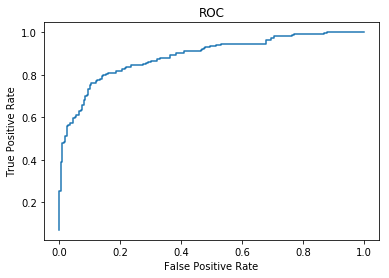

In [70]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)